In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from IPython import display 

In [2]:
!git clone https://github.com/nghi-huynh/BigDataChallenge2022.git

Cloning into 'BigDataChallenge2022'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 87 (delta 33), reused 67 (delta 16), pack-reused 0
Unpacking objects: 100% (87/87), done.


In [3]:
!mv /content/BigDataChallenge2022/merged_data .
!rm -r /content/BigDataChallenge2022

# Preliminary exploration

In [5]:
df = pd.read_csv("/content/merged_data/final_merge_data.csv")

In [7]:
df.loc[df['Entity'] == 'Canada']

,Entity,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income group,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
540,Canada,2000,13.866392,2.030059,12.108123,7.447730e+11,24271.00206,2007.880859,8.248144,6.83,High income,22620.0,6.984211,10.7
541,Canada,2001,13.853231,2.014213,12.382315,7.389820e+11,23822.06012,2063.927490,8.624824,7.22,High income,23030.0,6.984402,10.9
542,Canada,2002,13.834371,1.981742,12.783894,7.606490e+11,24255.33858,2159.315918,8.856704,7.66,High income,23610.0,6.950649,10.5
543,Canada,2003,13.807959,1.964556,11.525846,8.955410e+11,28300.46310,2562.914551,9.010901,7.57,High income,25860.0,6.905303,10.9
544,Canada,2004,13.783294,1.926634,12.028740,1.026690e+12,32143.68141,2925.067139,9.066281,7.19,High income,29890.0,6.884263,10.3
545,Canada,2005,13.759704,1.917180,13.272742,1.173110e+12,36382.50792,3296.501465,9.035406,6.76,High income,34810.0,6.842487,10.6
546,Canada,2006,13.840307,1.896588,12.742417,1.319260e+12,40504.06073,3788.090088,9.342102,6.32,High income,38520.0,6.872021,9.6
547,Canada,2007,14.071417,1.888389,12.874230,1.468820e+12,44659.89514,4212.990723,9.445004,6.04,High income,43090.0,6.901730,9.9
548,Canada,2008,14.356399,1.885977,13.289929,1.552990e+12,46710.50558,4474.974609,9.607099,6.14,High income,45650.0,6.969607,9.9
549,Canada,2009,14.602024,1.904711,13.941359,1.374630e+12,40876.31015,4371.552734,10.717165,8.34,High income,43250.0,7.053396,10.2


In [8]:
def EDA(df):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape of the data (rows, columns):' + '\033[0m')
    print(df.shape, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'All columns from the dataframe :' + '\033[0m')
    print(df.columns, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes and Missing values:' + '\033[0m')
    print(df.info(), 
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df.columns:
        print('\033[1m' + 'Unique values in {} :'.format(col) + '\033[0m',len(df[col].unique()))
    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summary statistics for the data :' + '\033[0m')
    print(df.describe(include='all'), 
          '\n------------------------------------------------------------------------------------\n')
    
        
    print('\033[1m' + 'Memory used by the data :' + '\033[0m')
    print(df.memory_usage(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df.duplicated().sum())
          
EDA(df)

EXPLORATORY DATA ANALYSIS :

Shape of the data (rows, columns):
(3260, 14) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['Entity', 'Year',
       'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)',
       'Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)',
       'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
       'health expenditure (% GDP)', 'unemployment rate', 'Income group',
       'Income',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
       'Suicide rate'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatypes and Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 1

# Data preprocessing

## Check missing values

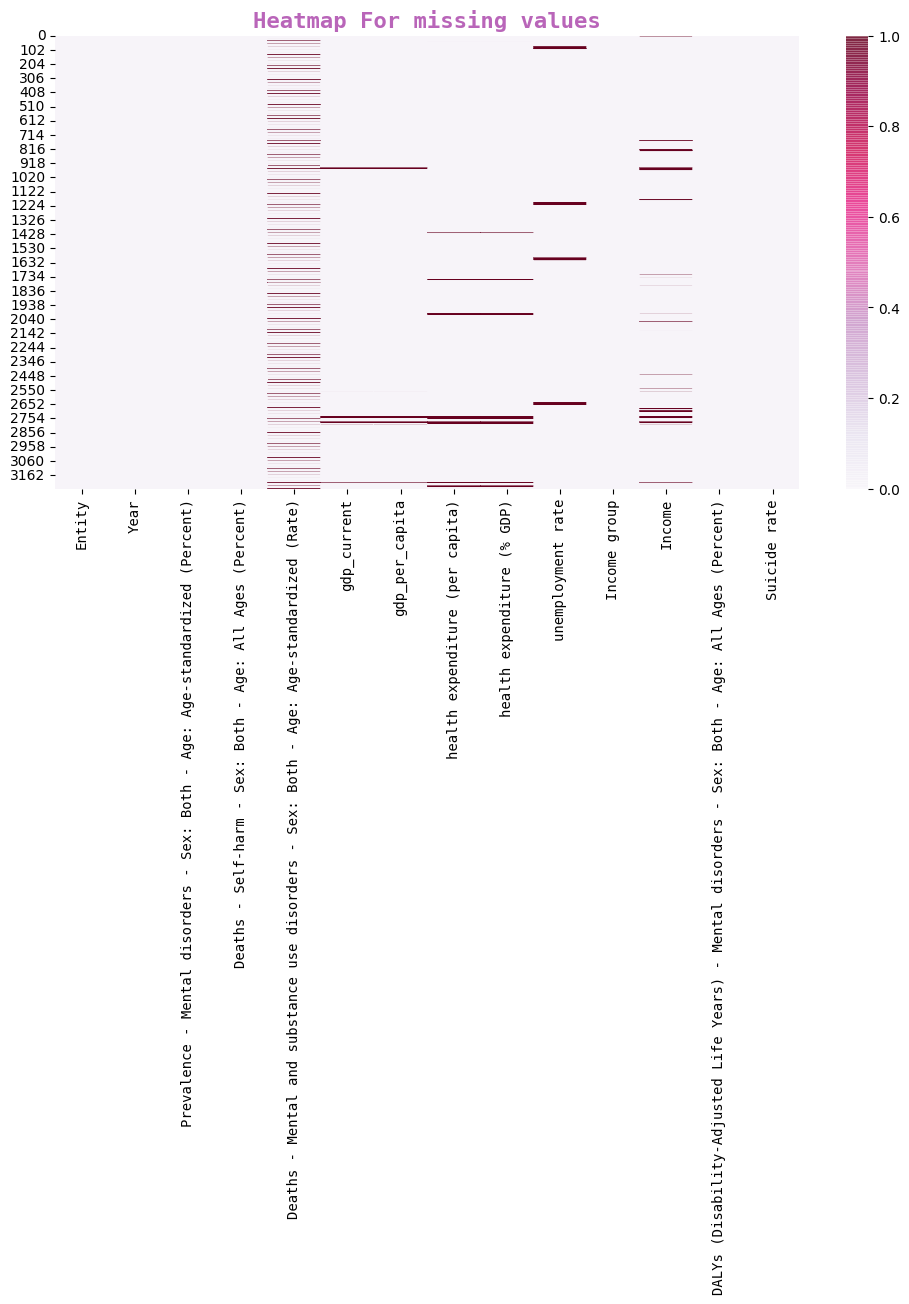

In [9]:
# Generate heatmap for missing values
plt.figure(figsize=(12,6) , dpi=100)
sns.heatmap(df.isna(), cmap='PuRd', cbar = True, alpha = 0.6)
plt.xticks(rotation=90)
hfont = {'fontname':'monospace'}
plt.title ('Heatmap For missing values',
           **hfont,
           color = 'darkmagenta',
           weight = 'semibold',
           fontsize = 16,
           alpha = 0.6)
plt.xticks(**hfont)
plt.show()

In [10]:
# Check the proportion of missing values
def missing_proportion(df):
  cols = []
  props = []
  prop = {'Column' : cols, 'Missing_Proportion': props}
  for col in df.columns:
      missing_prop = df[col].isna().sum() / df.shape[0] * 100
      if missing_prop > 0:
          cols.append(col)
          props.append(missing_prop)
  
  prop = pd.DataFrame(prop).sort_values('Missing_Proportion', ignore_index=True)
  prop.style.applymap(lambda x : "background-color: thistle")
  plt.show()
  return prop

In [11]:
prop = missing_proportion(df)
prop.style.applymap(lambda x : "background-color: thistle")

,Column,Missing_Proportion
0,gdp_current,1.134969
1,gdp_per_capita,1.134969
2,health expenditure (per capita),2.331288
3,health expenditure (% GDP),2.331288
4,unemployment rate,2.453988
5,Income,3.680982
6,Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),10.000000


## Clean dataset

**Which columns or rows to drop?**

We want to keep as many columns as possible, so instead of dropping columns, we will drop rows. Since we want to focus on the most recent years (within the past 10 years -2000-2019), we'll drop all the years before that (1990-1999).

## Imputation

The missing proportion looks better now. Now, **should we impute missing values?**

* For the **Descriptive analysis** (EDA and Visualization), we can use the data as is.
* For the **Predictive part**, there are two types of variable in our dataset

  * **Numerical**: `['Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)',
       'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
       'health expenditure (% GDP)', 'unemployment rate', 'Income',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
       'Suicide rate']`, we will use mean/median imputation
  * **Categorical**: `Income group`, we will check and fill in the income group manually

![](https://editor.analyticsvidhya.com/uploads/30381Imputation%20Techniques%20types.JPG)

In [12]:
# Let's check total number of countries reported
print('\033[1m' + 'Total countries surveyed :' + '\033[0m', len(df.Entity.value_counts()))

Total countries surveyed : 163


In [13]:
df.columns

Index(['Entity', 'Year',
       'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)',
       'Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)',
       'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
       'health expenditure (% GDP)', 'unemployment rate', 'Income group',
       'Income',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
       'Suicide rate'],
      dtype='object')

In [14]:
df.isnull().sum()

Entity                                                                                               0
Year                                                                                                 0
Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)                                             0
Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)             326
gdp_current                                                                                         37
gdp_per_capita                                                                                      37
health expenditure (per capita)                                                                     76
health expenditure (% GDP)                                                                          76
unemployment rate                                                        

In [19]:
cols_impute = ['Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)', 
               'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)', 
               'health expenditure (% GDP)', 'unemployment rate', 'Income',
               ]

In [18]:
countries = list(df['Entity'].unique())

In [20]:
len(countries)

163

In [21]:
# we use median imputation 
def median_impute(df, cols_impute, countries):
  for col in cols_impute:
    for country in countries:
      tmp = df.loc[df['Entity'] == country]
      median = tmp[col].median()
      tmp[col].fillna(median, inplace=True)  
      df.loc[df['Entity'] == country] = tmp   
  return df

In [23]:
tmp = median_impute(df,cols_impute, countries )

### Impute unemployment rate 

In [53]:
# median of unemployment rate based on income group
h = tmp.loc[tmp['Income group'] == 'High income']['unemployment rate'].median() # high income
lm = tmp.loc[tmp['Income group'] == 'Lower middle income']['unemployment rate'].median() # lower middle income
um = tmp.loc[tmp['Income group'] == 'Upper middle income']['unemployment rate'].median() # upper middle income


In [55]:
countries_impute = {'Grenada': ['Upper middle income',um], 'Kiribati':['Lower middle income',lm], 'Seychelles':['High income',h], 'Antigua and Barbuda':['High income',h]}

In [65]:
# impute based on income group
def income_group_impute(df, countries_impute, col):
  for country,income in countries_impute.items():
    tmp_dat = df.loc[df['Entity'] == country]
    tmp_dat[col].fillna(income[1], inplace=True)
    df.loc[df['Entity'] == country] = tmp_dat

In [66]:
income_group_impute(tmp,countries_impute,'unemployment rate')

### Impute health expenditure %GDP, and per capita

In [70]:
# median health expenditure %GDP, per capita
median_health_gdp = tmp.loc[tmp['Income group'] == 'Low income']['health expenditure (% GDP)'].median()
median_health_capita = tmp.loc[tmp['Income group'] == 'Low income']['health expenditure (per capita)'].median()

In [74]:
tmp_dat = tmp.loc[df['Entity'] == 'Somalia']
tmp_dat['health expenditure (% GDP)'].fillna(median_health_gdp, inplace=True)
tmp_dat['health expenditure (per capita)'].fillna(median_health_capita, inplace=True)
tmp.loc[df['Entity'] == 'Somalia'] = tmp_dat

In [76]:
tmp.loc[df['Entity'] == 'Somalia']

,Entity,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income group,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
2740,Somalia,2000,14.283669,0.516801,0.138820,5.529873e+09,386.437817,28.095603,5.333348,19.052000,Low income,290.0,1.390737,16.8
2741,Somalia,2001,14.308682,0.517693,0.134764,5.529873e+09,386.437817,28.095603,5.333348,19.038000,Low income,290.0,1.420468,16.5
2742,Somalia,2002,14.330885,0.525461,0.138494,5.529873e+09,386.437817,28.095603,5.333348,19.018999,Low income,290.0,1.451202,16.6
2743,Somalia,2003,14.350717,0.534280,0.144844,5.529873e+09,386.437817,28.095603,5.333348,19.016001,Low income,290.0,1.482518,16.6
2744,Somalia,2004,14.366487,0.537257,0.141565,5.529873e+09,386.437817,28.095603,5.333348,19.017000,Low income,290.0,1.502791,16.8
2745,Somalia,2005,14.377531,0.549540,0.140477,5.529873e+09,386.437817,28.095603,5.333348,19.013000,Low income,290.0,1.555142,16.6
2746,Somalia,2006,14.378105,0.547875,0.142796,5.529873e+09,386.437817,28.095603,5.333348,19.014000,Low income,290.0,1.582876,16.2
2747,Somalia,2007,14.373123,0.553814,0.146855,5.529873e+09,386.437817,28.095603,5.333348,18.896999,Low income,290.0,1.588427,15.9
2748,Somalia,2008,14.362407,0.568947,0.152593,5.529873e+09,386.437817,28.095603,5.333348,18.917000,Low income,290.0,1.630440,16.0
2749,Somalia,2009,14.354771,0.578861,0.153638,5.529873e+09,386.437817,28.095603,5.333348,18.937000,Low income,290.0,1.661201,16.0


In [75]:
tmp.isnull().sum()

Entity                                                                                             0
Year                                                                                               0
Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)                                           0
Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)             0
gdp_current                                                                                        0
gdp_per_capita                                                                                     0
health expenditure (per capita)                                                                    0
health expenditure (% GDP)                                                                         0
unemployment rate                                                                          

In [79]:
tmp.dtypes

Entity                                                                                              object
Year                                                                                                 int64
Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)                        float64
Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)                                           float64
Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)             float64
gdp_current                                                                                        float64
gdp_per_capita                                                                                     float64
health expenditure (per capita)                                                                    float64
health expenditure (% GDP)                                                                         float64
unemployment rate                    

In [80]:
tmp.to_csv('./final_processed_data.csv', index=False)